In [161]:
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
data = pd.read_csv('data_imdb_adventure.csv', dtype = {'release_date': str})
print(data.dtypes)
data.head()

movie_name             object
description            object
release_date           object
director               object
rating                float64
duration              float64
genre                  object
actors                 object
start_filming_date     object
end_filming_date       object
votes                 float64
dtype: object


,movie_name,description,release_date,director,rating,duration,genre,actors,start_filming_date,end_filming_date,votes
0,The Adam Project,"""After accidentally crash-landing in 2022, tim...",2022,Shawn Levy,6.8,106.0,"Action, Adventure, Comedy","Ryan Reynolds, Walker Scobell, Mark Ruffalo, J...",18 November 2020,8 March 2021,74592.0
1,Rot,A 13-year-old girl named Meilin turns into a g...,2022,Domee Shi,7.1,100.0,"Animation, Adventure, Comedy","Rosalie Chiang, Sandra Oh, Ava Morse, Hyein Park",NaN,NaN,39574.0
2,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",2021,Jon Watts,8.6,148.0,"Action, Adventure, Fantasy","Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",6 November 2020,26 March 2021,533570.0
3,The King's Man,"In the early years of the 20th century, the Ki...",2021,Matthew Vaughn,6.3,131.0,"Action, Adventure, Thriller","Ralph Fiennes, Gemma Arterton, Rhys Ifans, Har...",22 January 2019,NaN,97399.0
4,Uncharted,Street-smart Nathan Drake is recruited by seas...,2022,Ruben Fleischer,6.7,116.0,"Action, Adventure","Tom Holland, Mark Wahlberg, Antonio Banderas, ...",NaN,NaN,53748.0


In [163]:
# cast to correct format for dates
data[['release_date', 'start_filming_date', 'end_filming_date']] = data[['release_date', 'start_filming_date', 'end_filming_date']].apply(pd.to_datetime)
data.head()

,movie_name,description,release_date,director,rating,duration,genre,actors,start_filming_date,end_filming_date,votes
0,The Adam Project,"""After accidentally crash-landing in 2022, tim...",2022-01-01,Shawn Levy,6.8,106.0,"Action, Adventure, Comedy","Ryan Reynolds, Walker Scobell, Mark Ruffalo, J...",2020-11-18,2021-03-08,74592.0
1,Rot,A 13-year-old girl named Meilin turns into a g...,2022-01-01,Domee Shi,7.1,100.0,"Animation, Adventure, Comedy","Rosalie Chiang, Sandra Oh, Ava Morse, Hyein Park",NaT,NaT,39574.0
2,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",2021-01-01,Jon Watts,8.6,148.0,"Action, Adventure, Fantasy","Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",2020-11-06,2021-03-26,533570.0
3,The King's Man,"In the early years of the 20th century, the Ki...",2021-01-01,Matthew Vaughn,6.3,131.0,"Action, Adventure, Thriller","Ralph Fiennes, Gemma Arterton, Rhys Ifans, Har...",2019-01-22,NaT,97399.0
4,Uncharted,Street-smart Nathan Drake is recruited by seas...,2022-01-01,Ruben Fleischer,6.7,116.0,"Action, Adventure","Tom Holland, Mark Wahlberg, Antonio Banderas, ...",NaT,NaT,53748.0


### Visualizations

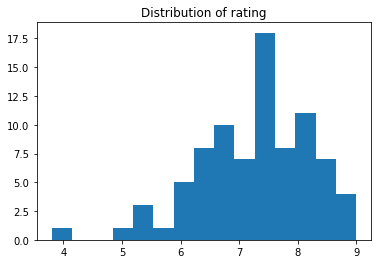

In [187]:

plt.hist(data['rating'], bins=15)
plt.title('Distribution of rating')
plt.show()

# outlier around 4, mean of rating around 7.5

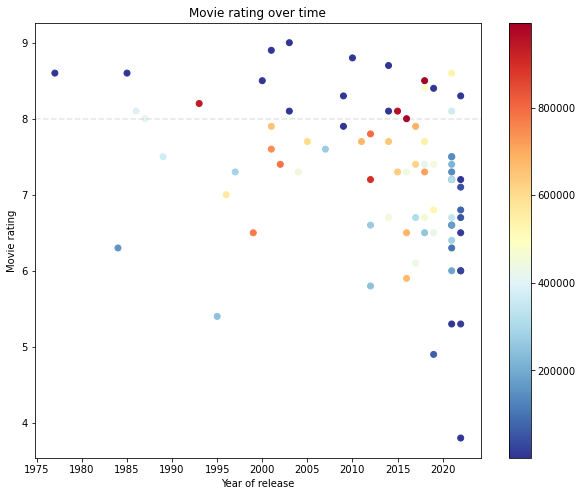

In [198]:
# 1. rating per year of release
plt.figure(figsize = (10, 8))
plt.scatter( data['release_date'], data['rating'], c = data['votes'], cmap='RdYlBu_r')
plt.axhline(y = 8, c = 'grey', alpha = 0.2, ls = '--')
plt.xlabel('Year of release')
plt.ylabel('Movie rating')
plt.title('Movie rating over time')
plt.colorbar()
plt.show()

# In general, the number of movies increase over time, probably due to launching giant movie producers and distributors such as netflix (1997), 
# # amazon's prime video 


In [185]:
# Movies to recomend, based on rating (at least 8) and the number of votes (at least 800 000).
data[(data['rating'] >= 8) & (data['votes'] >= 800000)].sort_values('rating', ascending=False)




,movie_name,description,release_date,director,rating,duration,genre,actors,start_filming_date,end_filming_date,votes
43,Avengers: Infinity War,The Avengers and their allies must be willing ...,2018-01-01,"Anthony Russo, Joe Russo",8.5,149.0,"Action, Adventure, Sci-Fi","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2017-01-23,2017-07-14,993549.0
54,Jurassic Park,A pragmatic paleontologist touring an almost c...,1993-01-01,Steven Spielberg,8.2,127.0,"Action, Adventure, Sci-Fi","Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",1992-08-24,1992-11-30,937948.0
38,Mad Max: Fury Road,"In a post-apocalyptic wasteland, a woman rebel...",2015-01-01,George Miller,8.1,120.0,"Action, Adventure, Sci-Fi","Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2012-06-02,2012-12-17,959836.0
49,Deadpool,A wisecracking mercenary gets experimented on ...,2016-01-01,Tim Miller,8.0,108.0,"Action, Adventure, Comedy","Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2015-03-23,2015-05-29,986057.0


In [199]:
# worst rated movie
data[ data['rating'] < 4 ]

,movie_name,description,release_date,director,rating,duration,genre,actors,start_filming_date,end_filming_date,votes
52,Im Dutzend noch billiger,The raucous exploits of a blended family of 12...,2022-01-01,Gail Lerner,3.8,107.0,"Adventure, Comedy, Family","Gabrielle Union, Zach Braff, Erika Christensen...",NaT,NaT,1249.0


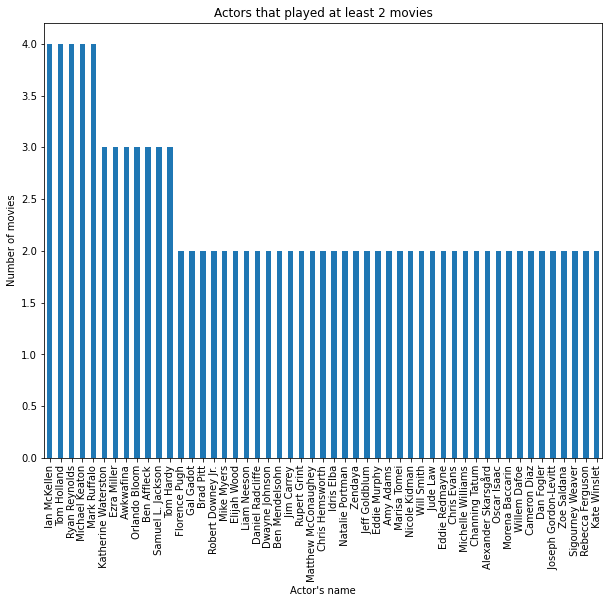

In [165]:
# 2. Movies per actor
movie_actors_dict = {}
for movie, actors in zip(data['movie_name'], data['actors']):
    movie_actors_dict[movie] = actors.split(',')
    # print(movie_actor_dict)
    # print('='*100)

movie_actors = pd.DataFrame(movie_actors_dict).melt(var_name= 'movie', value_name='actors')

# actors that played at least k number of movies
k = 2
nb_movies_per_actor = movie_actors['actors'].value_counts()

nb_movies_per_actor [nb_movies_per_actor >= k].plot(kind = 'bar', figsize = (10, 8))
plt.title(f'Actors that played at least {k} movies')
plt.ylabel("Number of movies")
plt.xlabel("Actor's name")
plt.show()


In [209]:
# Number of movies / director

# director
# There are 9 movies with 2 co-directors, 2 with 3 co-directors and 1 with 4 co-directors. So in total 12% of co-directed movies. In the next
# we'll only analyze movies for which there's only one director(88 % of all the movies)
data['director'].str.split(',').apply(len).value_counts()


1    88
2     9
3     2
4     1
Name: director, dtype: int64

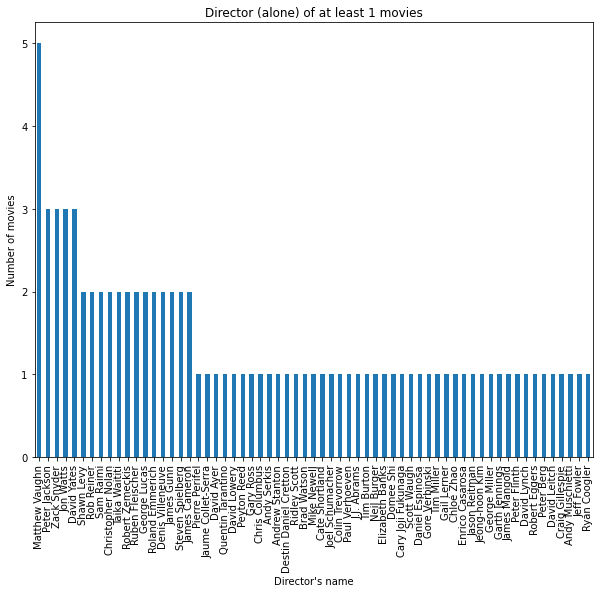

In [230]:
nb_movies_per_director = data['director'][data['director'].str.split(',').apply(len) == 1].value_counts()

# directed (alone) at least k number of movies
k = 1
nb_movies_per_director [nb_movies_per_director >= k].plot(kind = 'bar', figsize = (10, 8))
plt.title(f'Director (alone) of at least {k} movies')
plt.ylabel("Number of movies")
plt.xlabel("Director's name")
plt.show()

### Normalisation and standardization

In [251]:
# mean normalization of rating over time to film
data['time_to_film'] = data['end_filming_date'] - data['start_filming_date']

# We will consider only movies for which there's an end and start filming data(i.e. no missing value in 'time_to_film' column)...this represents 53% of the data
data['time_to_film'].isnull().value_counts()

False    53
True     47
Name: time_to_film, dtype: int64

In [298]:
complete_filming_dates = data[ data['time_to_film'].notnull() ]

complete_filming_dates['time_to_film_int'] = complete_filming_dates['time_to_film'].apply(str).str.extract(r'(^\d+)').squeeze().apply(int)

<ipython-input-298-375c6a5a6417>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_filming_dates['time_to_film_int'] = complete_filming_dates['time_to_film'].apply(str).str.extract(r'(^\d+)').squeeze().apply(int)


In [307]:
rating_time_to_film = (complete_filming_dates['rating'] / complete_filming_dates['time_to_film_int'])
normalized_mean_rating_time_to_film = rating_time_to_film.apply(lambda x: (x - rating_time_to_film.mean()) / rating_time_to_film.std())